# Problemas

Un trader celebra un forward para vender (short) 100.000 libras esterlinas por dólares estadounidenses a un tipo de cambio de 1,2700 dólares por libra.
¿Cuánto gana o pierde (en USD) si el tipo de cambio en
al final del contrato es (a) 1,2600 y (b) 1,2900?

Un forward es un contrato a largo plazo entre dos partes para comprar o vender un activo a precio fijado y en una fecha determinada. La diferencia con los contratos de futuros es que los forward se contratan en operaciones en Mercados OTC (over the counter o extrabursátiles).

Los forwards más comunes negociados en las tesorerías son sobre monedas, metales e instrumentos de renta fija. 

Existen dos formas de resolver los contratos de forward de moneda extranjera:
* Por compensación (non delivery forward): al vencimiento del contrato se compara el tipo de cambio spot contra el tipo de cambio forward, y el diferencial en contra es pagado por la parte correspondiente.
* Por entrega física (delivery forward): al vencimiento el comprador y el vendedor intercambian las monedas según el tipo de cambio pactado.

In [4]:
position=-1
size=100000
initial_price=1.2700
final_price_a=1.2600
final_price_b=1.2900

pnl_a=position*(final_price_a-initial_price)*size
pnl_b=position*(final_price_b-initial_price)*size

print(f'PNL a: ${round(pnl_a,2)}')


print(f'PNL b: ${round(pnl_b,2)}')

PNL a: 1000.0
PNL b: -2000.0


Digamos que tenemos otro problema que resolver y queremos una solución más general:
Un comerciante entra en un contrato de futuros de algodón en corto cuando el precio de los futuros es de 75 centavos por libra. El contrato es para la entrega de 50,000 libras. ¿Cuánto gana o pierde el comerciante si el precio del algodón al final del contrato es (a) 73.20 centavos por libra y (b) 76.30 centavos por libra?

In [5]:
def compute_pnl ( position , size , initial_price , final_price ) :
    pnl = position * ( final_price - initial_price ) * size
    pnl = round ( pnl , 2)
    print ( f"pnl: {pnl}")
    return pnl

 # solve exercise 1.2
compute_pnl ( -1 , 100000 , 1.2700 , 1.2600)
compute_pnl ( -1 , 100000 , 1.2700 , 1.2900)

# solve exercise 1.3
compute_pnl ( -1 , 50000 , 0.75 , 0.732)
compute_pnl ( -1 , 50000 , 0.75 , 0.763)

pnl: 1000.0
pnl: -2000.0
pnl: 900.0
pnl: -650.0


-650.0

In [14]:
import os
dir=os.getcwd()
dir

'd:\\Users\\User\\Documents\\Archivos Python VSCODE\\Notebooks Básicos\\Posición y Equity Curve\\notebooks'

Ahora, digamos que necesitamos calcular el PnL no solo para 1 o 2 operaciones, sino para 10. ¿Cómo podríamos hacerlo de manera eficiente?

In [16]:
import pandas as pd

trades_df=pd.read_csv('d:\\Users\\User\\Documents\\Archivos Python VSCODE\\Notebooks Básicos\\Posición y Equity Curve\\data\\trades.csv')

trades_df

,date,position,n_contracts,commodity,size,initial_price,final_price
0,2023-08-06,-1,1,Soybeans,5000,1060.20,1178.00
1,2023-08-19,-1,2,Cotton,50000,93.79,85.21
2,2023-12-01,1,50,Silver,5000,25.48,23.17
3,2023-12-19,1,1,Cocoa,10000,2530.00,2700.00
4,2023-12-27,-1,2,Wheat,5000,543.55,603.94
5,2023-12-30,-1,20,Gold,100,1844.88,2040.23
6,2024-01-29,1,60,Crude Oil,1000,47.72,53.02
7,2024-05-08,1,5,Wheat,5000,603.36,670.40
8,2024-05-13,-1,20,Gold,100,2315.84,2571.49
9,2024-05-14,-1,1,Cocoa,10000,2770.56,2700.51


In [18]:
def compute_pnl(trades_df):
    position=trades_df['position']*trades_df['n_contracts']
    price_diff=trades_df['final_price']-trades_df['initial_price']
    trades_df['pnl']=position*price_diff*trades_df['size']
    return trades_df

solution=compute_pnl(trades_df)

solution

,date,position,n_contracts,commodity,size,initial_price,final_price,pnl
0,2023-08-06,-1,1,Soybeans,5000,1060.20,1178.00,-589000.0
1,2023-08-19,-1,2,Cotton,50000,93.79,85.21,858000.0
2,2023-12-01,1,50,Silver,5000,25.48,23.17,-577500.0
3,2023-12-19,1,1,Cocoa,10000,2530.00,2700.00,1700000.0
4,2023-12-27,-1,2,Wheat,5000,543.55,603.94,-603900.0
5,2023-12-30,-1,20,Gold,100,1844.88,2040.23,-390700.0
6,2024-01-29,1,60,Crude Oil,1000,47.72,53.02,318000.0
7,2024-05-08,1,5,Wheat,5000,603.36,670.40,1676000.0
8,2024-05-13,-1,20,Gold,100,2315.84,2571.49,-511300.0
9,2024-05-14,-1,1,Cocoa,10000,2770.56,2700.51,700500.0


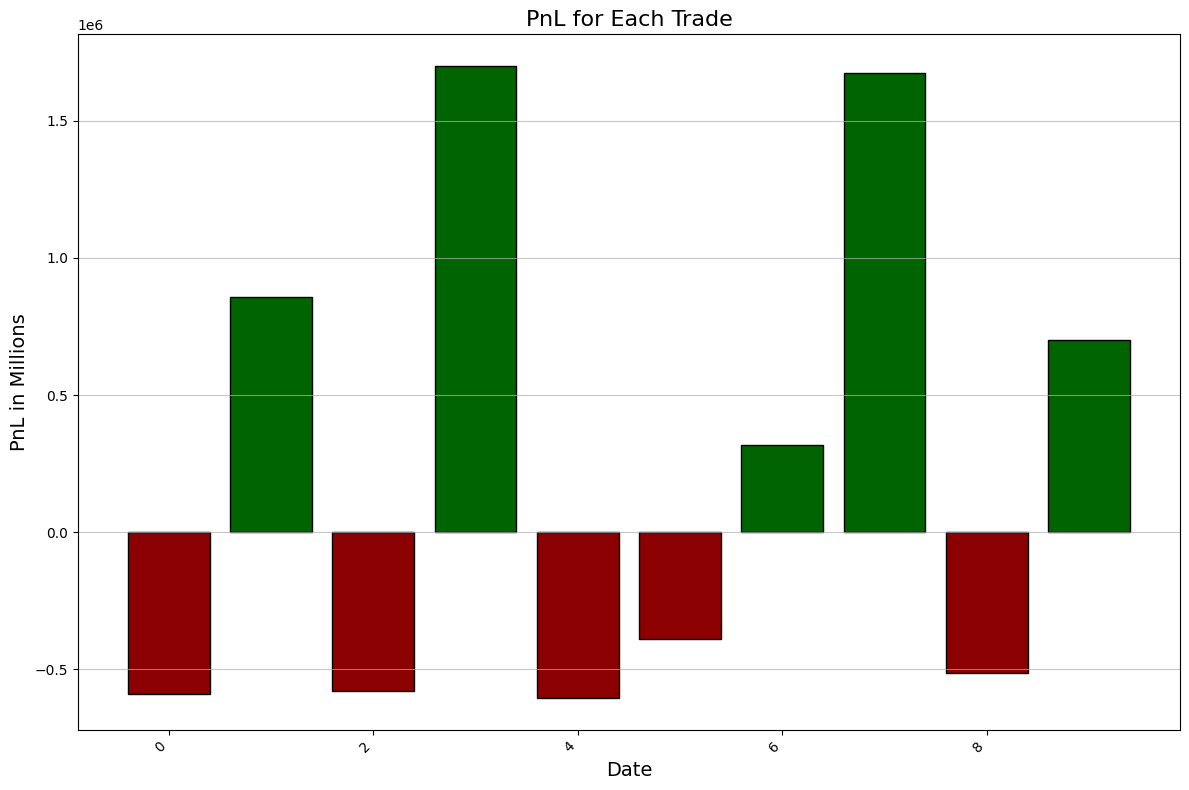

In [19]:
import matplotlib.pyplot as plt

colors = trades_df['pnl'].apply(lambda pnl: 'darkgreen' if pnl > 0 else 'darkred')

# Plot the PnL column
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(trades_df.index, trades_df['pnl'], color=colors, edgecolor='black')
ax.set_title('PnL for Each Trade', fontsize=16)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('PnL in Millions', fontsize=14)
ax.grid(axis='y', linestyle='-', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


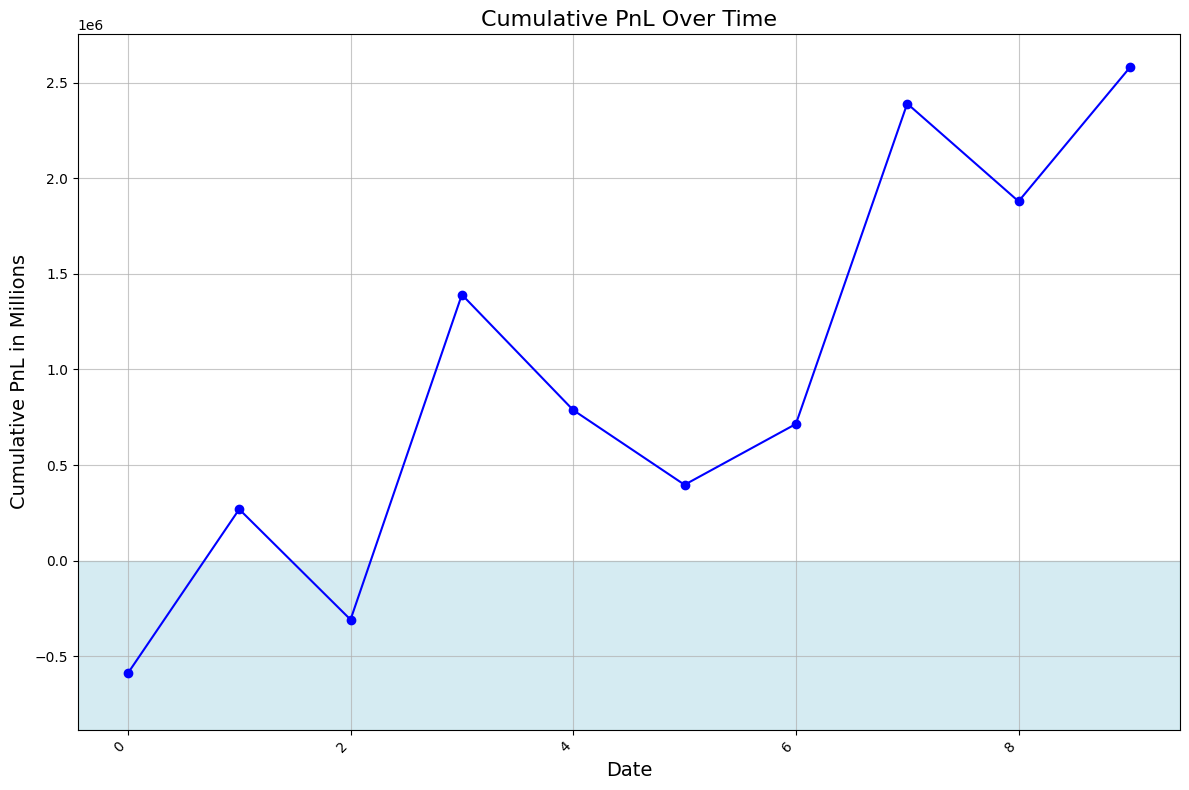

In [20]:
# Calculate the cumulative PnL
trades_df['cum-pnl'] = trades_df['pnl'].cumsum()

# Plot the Cumulative PnL
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(trades_df.index, trades_df['cum-pnl'], marker='o', linestyle='-', color='b')
ax.axhspan(ymin=min(trades_df['cum-pnl']) * 1.5, ymax=0, color='lightblue', alpha=0.5)
ax.set_title('Cumulative PnL Over Time', fontsize=16)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Cumulative PnL in Millions', fontsize=14)
ax.grid(True, linestyle='-', alpha=0.7)
ax.set_ylim(min(trades_df['cum-pnl']) * 1.5)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
